In [1]:
from tinyphysicsfile import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid
from controllers import w_pid
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


/home/khfifi/miniconda3/envs/comma/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

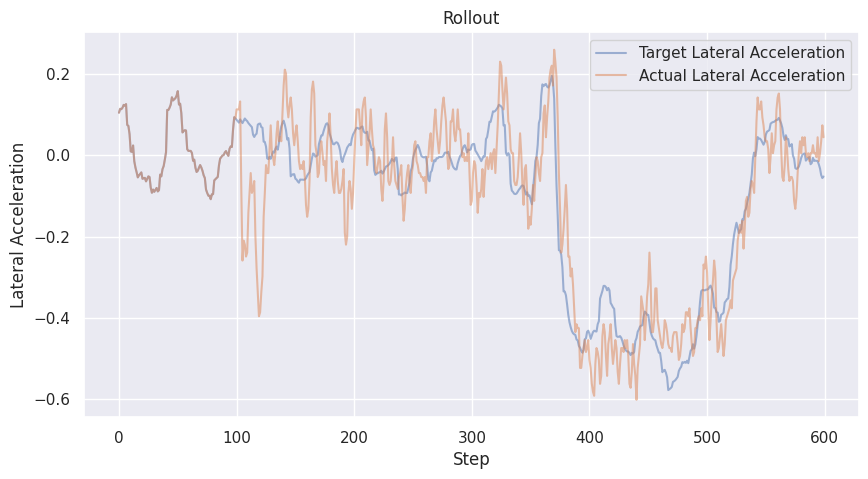

In [7]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller = pid.Controller()
sim = TinyPhysicsSimulator(model, "./data/00101.csv", controller=controller, debug=False)
sim.rollout()
plot_rollout(sim)

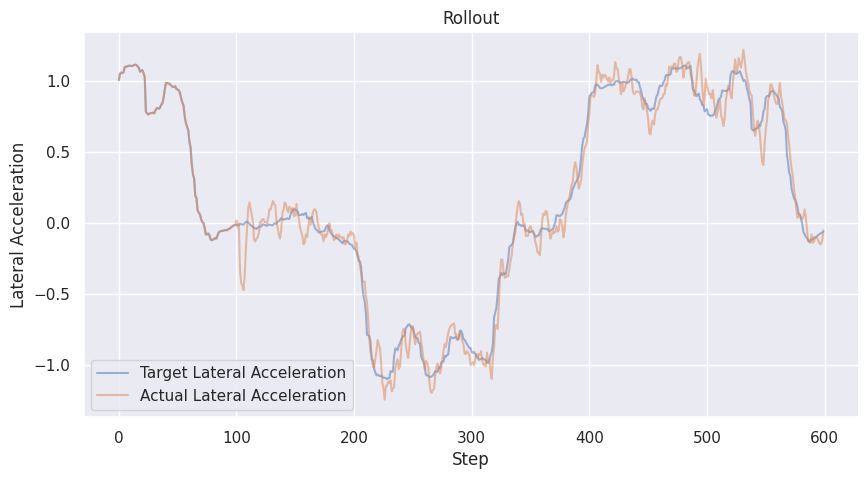

In [8]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller = w_pid.Controller()
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
sim.rollout()
plot_rollout(sim)